### prompt-prompt matrix gated on 136Ba delayed gamma

In [1]:
ifstream ifs("/data/d3/zhangjizhi/MNT/validID.txt");
int runid;
TH2F *pp = new TH2F("pp","prompt-prompt gamma matrix",2000,0,2000,2000,0,2000);
while (ifs>>runid){
    TFile *ipf = new TFile(Form("/data/d3/zhangjizhi/MNT/MATRIX/promptprompt/ppmat%04d.root",runid));
    TH2F *buf = (TH2F*)ipf->Get("pp");
    pp->Add(pp,buf);
    delete buf;
}

In [2]:
TCanvas *c1 = new TCanvas;

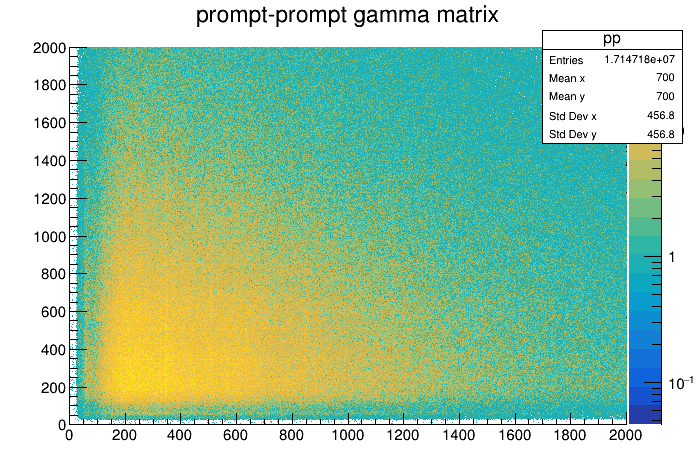

In [3]:
pp->Draw("colz");
c1->SetLogz();
c1->Draw();

#### 载入函数

In [4]:
gROOT->ProcessLine(".L bgsub.C");
gROOT->ProcessLine(".L bgsub_radware.C");
gROOT->ProcessLine(".L gate.C");
gROOT->ProcessLine(".L draw_peaks.C");

#### 减本底总投影谱，观察开窗峰附近情况

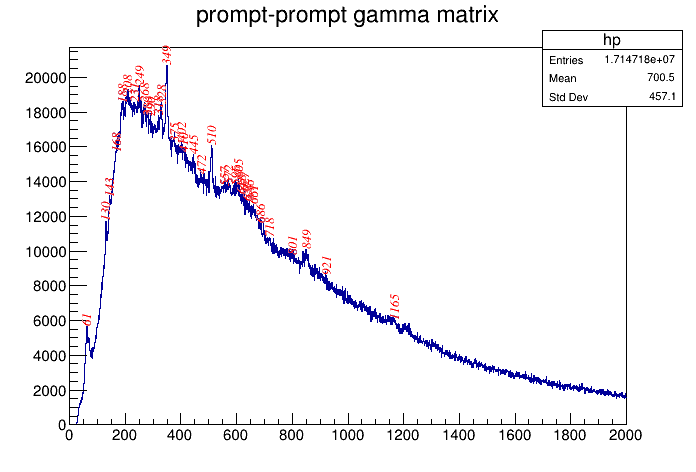

In [5]:
TH1D *hp = pp->ProjectionX("hp");
draw_peaks(hp,3);

In [6]:
double prompt[7]  = {143.9,328.,349.,509.9,849.,1164.,1215.};
int num;

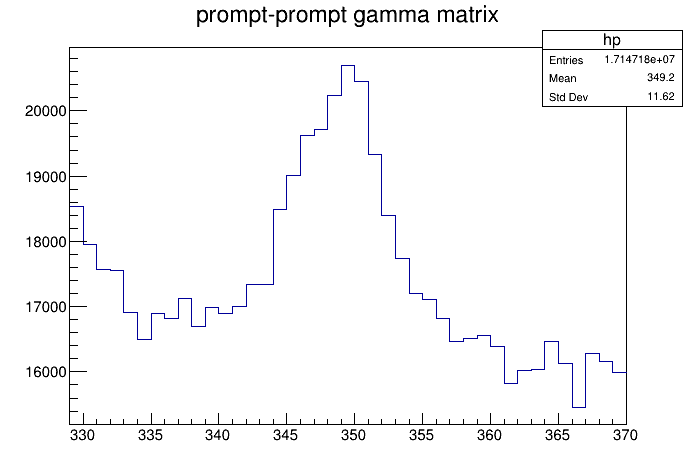

In [7]:
num = 2;
hp->SetAxisRange(prompt[num]-20,prompt[num]+20,"X");
hp->Draw();
c1->Draw();

![136Ba_level_scheme](../img/136Ba_level_scheme.png)

#### 预期符合关系

|peaks| 349 | 510 | 849 | 328 | 1164 | 144 | 1215 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 349 | X | O | O | O | O | O | O |
| 510 | O | X | O | O | O | X | X |
| 849 | O | O | X | O | X | X | X |
| 328 | O | O | O | X | X | O | O |
| 1164| O | O | X | X | X | X | X |
| 144 | O | X | X | O | X | X | O |
| 1215| O | X | X | O | X | O | X |

In [8]:
%jsroot on
TH2D *ppsub = bgsub_radware(pp);//二维减本底谱
TH1D *gate_radware, *gate_raw;//开窗谱

#### 349.0 keV gate

In [9]:
gate_radware = gate(ppsub,349.,1);
draw_peaks(gate_radware);

|peaks| 349 | 510 | 849 | 328 | 1164 | 144 | 1215 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 349 | X | O | O | O | O | O | O |

In [10]:
gate_raw = gate(pp,349.,1,-16,-16,14,14);
draw_peaks(gate_raw);

#### 510 keV gate

In [11]:
gate_radware = gate(ppsub,509.9,2);
draw_peaks(gate_radware);

|peaks| 349 | 510 | 849 | 328 | 1164 | 144 | 1215 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 349 | X | O | O | O | O | O | O |
| 510 | O | X | O | O | O | X | X |

In [12]:
gate_raw = gate(pp,509.9,1,-16,-16,14,14);
draw_peaks(gate_raw);

#### 849 keV gate

In [13]:
gate_radware = gate(ppsub,849.,2);
draw_peaks(gate_radware);

|peaks| 349 | 510 | 849 | 328 | 1164 | 144 | 1215 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 349 | X | O | O | O | O | O | O |
| 510 | O | X | O | O | O | X | X |
| 849 | O | O | X | O | X | X | X |

In [14]:
gate_raw = gate(pp,849.,1,-16,-16,14,14);
draw_peaks(gate_raw);

#### 328 keV gate

In [15]:
gate_radware = gate(ppsub,329.,2);
draw_peaks(gate_radware);

|peaks| 349 | 510 | 849 | 328 | 1164 | 144 | 1215 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 349 | X | O | O | O | O | O | O |
| 510 | O | X | O | O | O | X | X |
| 849 | O | O | X | O | X | X | X |
| 328 | O | O | O | X | X | O | O |

In [16]:
gate_raw = gate(pp,328.,1,-3,-3,4,4);
draw_peaks(gate_raw);